# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

**DO NOT DELETE THIS CELL**


## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa4.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment.If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.
9. Only Seaborn,numpy,pandas,sklearn,matplotlib packages will be allowed. Failing to abide will lead to a **-10 decrement in your scores.**
10. All visualizations (including scatter plots) should have at least 4-5 meaningful lines explaining about it. Failure to do so, will lead to reduction in marks.


## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


You have 3 dataset files . 
You need to submit this ipython file after renaming it. 
Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [ ]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [ ]:
#########################begin code for Task 1-a
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusteringdata=pd.read_csv("clusteringdata.csv")
clusteringdata

    
## Describe which is the optimal value for K and explain why you choose it as the optimal value


Age          WorkClass  Fnlwght      Education  EducationNumber  \
0      39          State-gov    77516      Bachelors               13   
1      50   Self-emp-not-inc    83311      Bachelors               13   
2      38            Private   215646        HS-grad                9   
3      53            Private   234721           11th                7   
4      28            Private   338409      Bachelors               13   
...   ...                ...      ...            ...              ...   
4995   43            Private   222971        5th-6th                3   
4996   31            Private   259425        HS-grad                9   
4997   47       Self-emp-inc   212120        HS-grad                9   
4998   26            Private   245880        HS-grad                9   
4999   58          Local-gov    54947   Some-college               10   

            MaritalStatus          Occupation    Relationship    Race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
...                   ...                 ...             ...     ...   
4995        Never-married   Machine-op-inspct       Unmarried   White   
4996   Married-civ-spouse        Craft-repair         Husband   White   
4997   Married-civ-spouse        Craft-repair         Husband   White   
4998        Never-married        Adm-clerical   Not-in-family   White   
4999        Never-married      Prof-specialty   Not-in-family   White   

          Sex  CapitalGain  CapitalLoss  HoursPerWeek   NativeCountry   Class  
0        Male         2174            0            40   United-States   <=50K  
1        Male            0            0            13   United-States   <=50K  
2        Male            0            0            40   United-States   <=50K  
3        Male            0            0            40   United-States   <=50K  
4      Female            0            0            40            Cuba   <=50K  
...       ...          ...          ...           ...             ...     ...  
4995   Female            0            0            40          Mexico   <=50K  
4996     Male            0            0            40   United-States    >50K  
4997     Male            0            0            40   United-States    >50K  
4998     Male            0            0            60   United-States   <=50K  
4999   Female            0            0            55   United-States   <=50K  

[5000 rows x 15 columns]

## Split of categorical and continuous features

In [ ]:
# https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f 
categorical_features = ['WorkClass', 'Education', "MaritalStatus", "Occupation", "Relationship", "Race", "Sex", "NativeCountry", "Class"]
continuous_features = ['Age', 'Fnlwght', 'EducationNumber', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek']
clusteringdata[continuous_features].describe()

Age       Fnlwght  EducationNumber   CapitalGain  CapitalLoss  \
count  5000.000000  5.000000e+03      5000.000000   5000.000000  5000.000000   
mean     38.600200  1.907684e+05        10.079600   1033.640200    93.696800   
std      13.594695  1.063596e+05         2.534906   7051.802077   410.801418   
min      17.000000  1.930200e+04         1.000000      0.000000     0.000000   
25%      28.000000  1.176958e+05         9.000000      0.000000     0.000000   
50%      37.000000  1.794750e+05        10.000000      0.000000     0.000000   
75%      47.000000  2.416575e+05        12.000000      0.000000     0.000000   
max      90.000000  1.033222e+06        16.000000  99999.000000  2547.000000   

       HoursPerWeek  
count   5000.000000  
mean      40.519000  
std       12.109193  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000

## To use the categorical features, we need to convert the categorical features to binary using pandas get dummies

In [ ]:
# https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f 
for col in categorical_features:
    dummies = pd.get_dummies(clusteringdata[col], prefix=col)
    clusteringdata = pd.concat([clusteringdata, dummies], axis=1)
    clusteringdata.drop(col, axis=1, inplace=True)
clusteringdata

Age  Fnlwght  EducationNumber  CapitalGain  CapitalLoss  HoursPerWeek  \
0      39    77516               13         2174            0            40   
1      50    83311               13            0            0            13   
2      38   215646                9            0            0            40   
3      53   234721                7            0            0            40   
4      28   338409               13            0            0            40   
...   ...      ...              ...          ...          ...           ...   
4995   43   222971                3            0            0            40   
4996   31   259425                9            0            0            40   
4997   47   212120                9            0            0            40   
4998   26   245880                9            0            0            60   
4999   58    54947               10            0            0            55   

      WorkClass_ ?  WorkClass_ Federal-gov  WorkClass_ Local-gov  \
0                0                       0                     0   
1                0                       0                     0   
2                0                       0                     0   
3                0                       0                     0   
4                0                       0                     0   
...            ...                     ...                   ...   
4995             0                       0                     0   
4996             0                       0                     0   
4997             0                       0                     0   
4998             0                       0                     0   
4999             0                       0                     1   

      WorkClass_ Private  ...  NativeCountry_ Scotland  NativeCountry_ South  \
0                      0  ...                        0                     0   
1                      0  ...                        0                     0   
2                      1  ...                        0                     0   
3                      1  ...                        0                     0   
4                      1  ...                        0                     0   
...                  ...  ...                      ...                   ...   
4995                   1  ...                        0                     0   
4996                   1  ...                        0                     0   
4997                   0  ...                        0                     0   
4998                   1  ...                        0                     0   
4999                   0  ...                        0                     0   

      NativeCountry_ Taiwan  NativeCountry_ Thailand  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
...                     ...                      ...   
4995                      0                        0   
4996                      0                        0   
4997                      0                        0   
4998                      0                        0   
4999                      0                        0   

      NativeCountry_ Trinadad&Tobago  NativeCountry_ United-States  \
0                                  0                             1   
1                                  0                             1   
2                                  0                             1   
3                                  0                             1   
4                                  0                             0   
...                              ...                           ...   
4995                               0                             0   
4996                               0          

In [ ]:
# # https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
# mms = MinMaxScaler()
# mms.fit(clusteringdata)
# data_transformed = mms.transform(clusteringdata)

In [ ]:
# # https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
# Sum_of_squared_distances = []
# K = range(1,15)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(data_transformed)
#     Sum_of_squared_distances.append(km.inertia_)

In [ ]:
# # https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [ ]:
# # https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/ 
# from sklearn.cluster import KMeans
# # We have to find the optimal K value for clustering the data. Now we are using the Elbow method to find the optimal K value 
# wcss = [] 
# for i in range(1, 11): 
#   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#   kmeans.fit(clusteringdata) 
#   wcss.append(kmeans.inertia_)
# # “init” argument is the method for initializing the centroid. We calculated the WCSS value for each K value. Now we have to plot the WCSS with K value 
# plt.plot(range(1, 11), wcss)
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS') 
# plt.show()

## For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k
- The k is from 1 to 10
- we can clearly see that x is at 3, graph clearly has an elbow 
- After x=3, the graph starts to move parallel to the X-axis. So 3 is an optimal number of clusters 


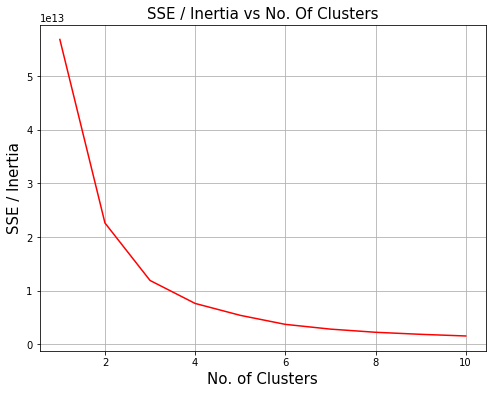

In [ ]:
# https://vitalflux.com/k-means-elbow-point-method-sse-inertia-plot-python/ 
def drawSSEPlotForKMeans(df, column_indices, n_clusters=10, max_iter=300, tol=1e-04, init='k-means++', n_init=10, algorithm='auto'):
    import matplotlib.pyplot as plt
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1, algorithm=algorithm)
        km.fit_predict(df.iloc[:, column_indices])
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), inertia_values, color='red')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE / Inertia', fontsize=15)
    plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

drawSSEPlotForKMeans(clusteringdata, list(range(clusteringdata.shape[1])), n_clusters=10)

1.The K value is from 1 to 10.<br>
2.From above graph we can see that elbow is at 3.<br>
3.After no.of clusters=3 the curve is parallel to X-axis.

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2,3,4 and visualize the predicted training samples and actual training samples on scatter plots. Use 80% of the dataset for training and 20% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



## We are expecting numerical values
- The dataset clusteringdata contain text or categorical values 
- For example, WorkClass attribute having values like State-gov, Self-emp-not-inc, Private etc
- We need to convert categorical values into numerical values
- We are going to choose Label Encoding



In [ ]:
# https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd 
# Label Encoding 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

clusteringdata=pd.read_csv("clusteringdata.csv")
clusteringdata
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
for attribute in categorical_features:
  clusteringdata[str(attribute)] = labelencoder.fit_transform(clusteringdata[str(attribute)])
clusteringdata

Age  WorkClass  Fnlwght  Education  EducationNumber  MaritalStatus  \
0      39          6    77516          9               13              4   
1      50          5    83311          9               13              2   
2      38          3   215646         11                9              0   
3      53          3   234721          1                7              2   
4      28          3   338409          9               13              2   
...   ...        ...      ...        ...              ...            ...   
4995   43          3   222971          4                3              4   
4996   31          3   259425         11                9              2   
4997   47          4   212120         11                9              2   
4998   26          3   245880         11                9              4   
4999   58          2    54947         15               10              4   

      Occupation  Relationship  Race  Sex  CapitalGain  CapitalLoss  \
0              1             1     4    1         2174            0   
1              4             0     4    1            0            0   
2              6             1     4    1            0            0   
3              6             0     2    1            0            0   
4             10             5     2    0            0            0   
...          ...           ...   ...  ...          ...          ...   
4995           7             4     4    0            0            0   
4996           3             0     4    1            0            0   
4997           3             0     4    1            0            0   
4998           1             1     4    1            0            0   
4999          10             1     4    0            0            0   

      HoursPerWeek  NativeCountry  Class  
0               40             37      0  
1               13             37      0  
2               40             37      0  
3               40             37      0  
4               40              5      0  
...            ...            ...    ...  
4995            40             24      0  
4996            40             37      1  
4997            40             37      1  
4998            60             37      0  
4999            55             37      0  

[5000 rows x 15 columns]

## Use 80% of the dataset for training and 20% of the dataset for testing


In [ ]:
###################begin code for Task 1-b-1: Split the datasetand set the random_state as 2021 without fail

### Important!!!

# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://www.aionlinecourse.com/tutorial/machine-learning/k-nearest-neighbor
from sklearn.model_selection import train_test_split
X = clusteringdata.drop(columns=['Class'])
y = clusteringdata['Class']
print("Before split the dataset")
print(X.shape)
# Standardise the data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# Split your dataset 80% for training, and 20% for testing the classifier
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2021)
print("After split the dataset")
print(x_train.shape)
print(x_test.shape)

###################end code for Task 1-b-1

Before split the dataset
(5000, 14)
After split the dataset
(4000, 14)
(1000, 14)


## Principal Component Analysis 


## K = 2

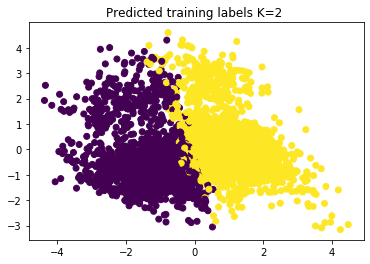

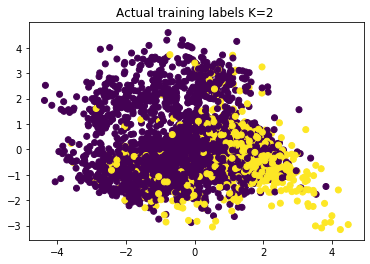

In [ ]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
two_cluster_Kmean = KMeans(n_clusters=2, random_state=2021).fit(x_train)

# Compute cluster centers and predict cluster index for each sample 
x_train_index = two_cluster_Kmean.predict(x_train)

# Model and fit the data to the PCA model
# https://www.youtube.com/watch?v=QdBy02ExhGI&t=470s&ab_channel=KrishNaik 
pca = PCA(n_components=2)
pca = pca.fit(x_train)
X_train_pca = pca.transform(x_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]


## Visualize using K=2 
plt.title("Predicted training labels K=2 ")
plt.scatter(x,y,c=x_train_index)
plt.show()
plt.title("Actual training labels K=2 ")
plt.scatter(x,y,c=y_train)
plt.show()

###################end code for Task 1-b-2


1. K means model with number of clusters=2 is trained.<br>
2. The dataset is of 14D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 14D data is converted 2D for visualization.<br>
4. From the above predicted training labels we can see the two clusters are well separated.<br>
5. In the actual training labels the datapoints are overlapping.

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

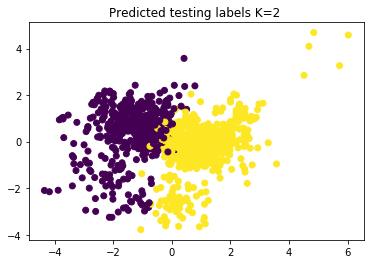

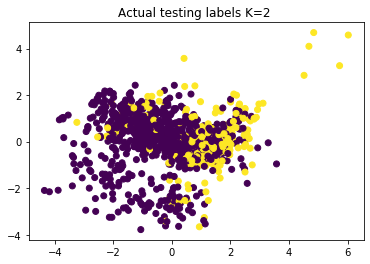

In [ ]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# Use the trained model in previous step
# So, we are using two_cluster_Kmean = KMeans(n_clusters=2, random_state=2021).fit(x_train)

# predict cluster index for each sample 
x_test_index = two_cluster_Kmean.predict(x_test)

# Model and fit the data to the PCA model
# https://www.youtube.com/watch?v=QdBy02ExhGI&t=470s&ab_channel=KrishNaik 
pca = PCA(n_components=2)
pca = pca.fit(x_test)
X_test_pca = pca.transform(x_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

## Visualize using K=2 
plt.title("Predicted testing labels K=2 ")
plt.scatter(x,y,c=x_test_index)
plt.show()
plt.title("Actual testing labels K=2 ")
plt.scatter(x,y,c=y_test)
plt.show()





###################end code for Task 1-b-3

1. K means model with number of clusters=2 is trained and for test data the cluster numbers are predicted.<br>
2. The dataset is of 14D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 14D data is converted 2D for visualization.<br>
4. From the above predicted test labels we can see the two clusters are well separated.<br>
5. In the actual test labels the datapoints are overlapping.

In [ ]:
###################begin code for Task 1-b-4: Print out a 2-D confusion matrix for all K values calculated above
from sklearn.metrics import confusion_matrix
print("Confusion matrix for training data \n",confusion_matrix(y_train,x_train_index))
print("Confusion matrix for testing data \n",confusion_matrix(y_test,x_test_index))

###################end code for Task 1-b-4

Confusion matrix for training data 
 [[1578 1449]
 [ 157  816]]
Confusion matrix for testing data 
 [[392 360]
 [ 32 216]]


## K = 3

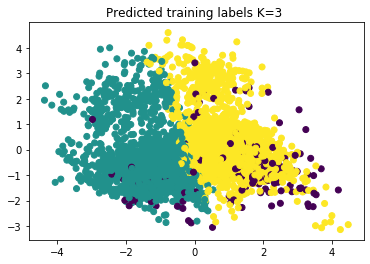

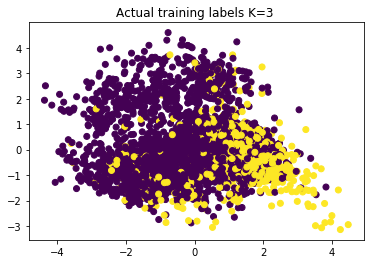

In [ ]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
three_cluster_Kmean = KMeans(n_clusters=3, random_state=2021).fit(x_train)

# Compute cluster centers and predict cluster index for each sample 
x_train_index = three_cluster_Kmean.predict(x_train)

# Model and fit the data to the PCA model
# https://www.youtube.com/watch?v=QdBy02ExhGI&t=470s&ab_channel=KrishNaik 
pca = PCA(n_components=2)
pca = pca.fit(x_train)
X_train_pca = pca.transform(x_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]


## Visualize using K=3 
plt.title("Predicted training labels K=3 ")
plt.scatter(x,y,c=x_train_index)
plt.show()
plt.title("Actual training labels K=3 ")
plt.scatter(x,y,c=y_train)
plt.show()

###################end code for Task 1-b-2


1. K means model with number of clusters=3 is trained and for train data the cluster numbers are predicted.<br>
2. The dataset is of 14D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 14D data is converted 2D for visualization.<br>
4. From the above predicted train labels we can see the two clusters are well separated and the third cluster(purple points) is overlapping with these two clusers.<br>


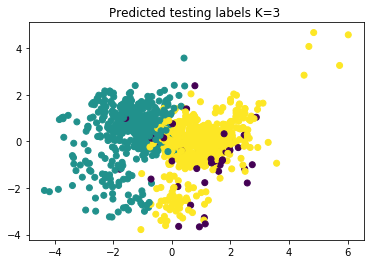

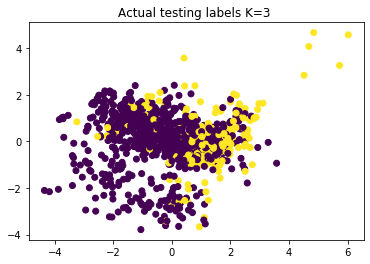

In [ ]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# Use the trained model in previous step
# So, we are using three_cluster_Kmean = KMeans(n_clusters=3, random_state=2021).fit(x_train)

# predict cluster index for each sample 
x_test_index = three_cluster_Kmean.predict(x_test)

# Model and fit the data to the PCA model
# https://www.youtube.com/watch?v=QdBy02ExhGI&t=470s&ab_channel=KrishNaik 
pca = PCA(n_components=2)
pca = pca.fit(x_test)
X_test_pca = pca.transform(x_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

## Visualize using K=3 
plt.title("Predicted testing labels K=3 ")
plt.scatter(x,y,c=x_test_index)
plt.show()
plt.title("Actual testing labels K=3 ")
plt.scatter(x,y,c=y_test)
plt.show()





###################end code for Task 1-b-3

1. K means model with number of clusters=3 is trained and for test data the cluster index are predicted.<br>
2. The dataset is of 14D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 14D data is converted 2D for visualization.<br>
4. From the above predicted test labels we can see the two clusters are well separated and the third cluster(purple points) is overlapping with these two clusers.<br>


In [ ]:
###################begin code for Task 1-b-4: Print out a 2-D confusion matrix for all K values calculated above
from sklearn.metrics import confusion_matrix
print("Confusion matrix for training data \n",confusion_matrix(y_train,x_train_index))
print("Confusion matrix for testing data \n",confusion_matrix(y_test,x_test_index))

###################end code for Task 1-b-4

Confusion matrix for training data 
 [[  94 1523 1410]
 [ 108  140  725]
 [   0    0    0]]
Confusion matrix for testing data 
 [[ 24 379 349]
 [ 23  30 195]
 [  0   0   0]]


## K = 4

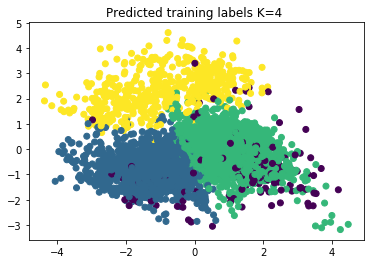

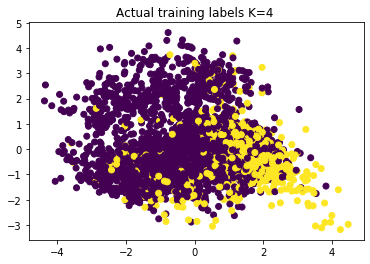

In [ ]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
four_cluster_Kmean = KMeans(n_clusters=4, random_state=2021).fit(x_train)

# Compute cluster centers and predict cluster index for each sample 
x_train_index = four_cluster_Kmean.predict(x_train)

# Model and fit the data to the PCA model
# https://www.youtube.com/watch?v=QdBy02ExhGI&t=470s&ab_channel=KrishNaik 
pca = PCA(n_components=2)
pca = pca.fit(x_train)
X_train_pca = pca.transform(x_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]


## Visualize using K=4 
plt.title("Predicted training labels K=4 ")
plt.scatter(x,y,c=x_train_index)
plt.show()
plt.title("Actual training labels K=4 ")
plt.scatter(x,y,c=y_train)
plt.show()

###################end code for Task 1-b-2


1. K means model with number of clusters=4 is trained and for train data the cluster index are predicted.<br>
2. The dataset is of 14D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 14D data is converted 2D for visualization.<br>
4. From the above predicted test labels we can see the three clusters are well separated and the fourth cluster(purple points) is overlapping with these two clusers.<br>


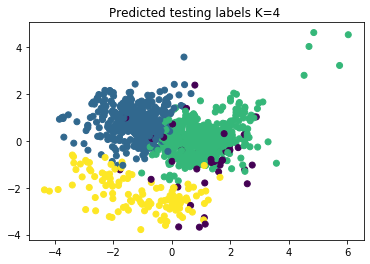

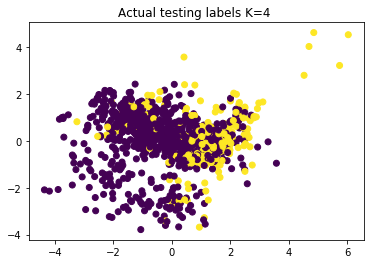

In [ ]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# Use the trained model in previous step
# So, we are using four_cluster_Kmean = KMeans(n_clusters=4, random_state=2021).fit(x_train)

# predict cluster index for each sample 
x_test_index = four_cluster_Kmean.predict(x_test)

# Model and fit the data to the PCA model
# https://www.youtube.com/watch?v=QdBy02ExhGI&t=470s&ab_channel=KrishNaik 
pca = PCA(n_components=2)
pca = pca.fit(x_test)
X_test_pca = pca.transform(x_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

## Visualize using K=4 
plt.title("Predicted testing labels K=4 ")
plt.scatter(x,y,c=x_test_index)
plt.show()
plt.title("Actual testing labels K=4 ")
plt.scatter(x,y,c=y_test)
plt.show()





###################end code for Task 1-b-3

1. K means model with number of clusters=4 is trained and for test data the cluster index are predicted.<br>
2. The dataset is of 14D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 14D data is converted 2D for visualization.<br>
4. From the above predicted test labels we can see the two clusters are well separated and the third cluster(purple points) is overlapping with these two clusers.<br>


In this step, you need to provide the evaluation of your clustering model. Print out a 2D confusion matrix.

In [ ]:
###################begin code for Task 1-b-4: Print out a 2-D confusion matrix for all K values calculated above
from sklearn.metrics import confusion_matrix
print("Confusion matrix for training data \n",confusion_matrix(y_train,x_train_index))
print("Confusion matrix for testing data \n",confusion_matrix(y_test,x_test_index))

###################end code for Task 1-b-4

Confusion matrix for training data 
 [[  93 1253 1194  487]
 [ 108  138  699   28]
 [   0    0    0    0]
 [   0    0    0    0]]
Confusion matrix for testing data 
 [[ 24 316 309 103]
 [ 23  30 184  11]
 [  0   0   0   0]
 [  0   0   0   0]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [ ]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = x_train
cosine_distance = pairwise_distances(pdm_train,metric='cosine')
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
complete_cosine = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="cosine").fit_predict(x_train)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
complete_euclidean = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="euclidean").fit_predict(x_train)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
complete_manhattan = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="manhattan").fit_predict(x_train)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
average_cosine = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="cosine").fit_predict(x_train)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
average_euclidean = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="euclidean").fit_predict(x_train)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
average_manhattan = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="manhattan").fit_predict(x_train)

## Print the 2-D confusion matrix with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. 

print("F1-score for complete linkage + cosine", f1_score(y_train, complete_cosine))
print("F1-score for complete linkage + euclidean", f1_score(y_train, complete_euclidean))
print("F1-score for complete linkage + manhattan", f1_score(y_train, complete_manhattan))
print("F1-score for average linkage + cosine", f1_score(y_train, average_cosine))
print("F1-score for average linkage + euclidean", f1_score(y_train, average_euclidean))
print("F1-score for average linkage + manhattan", f1_score(y_train, average_manhattan))

###################end code for Task 2-a


F1-score for complete linkage + cosine 0.2399042775949746
F1-score for complete linkage + euclidean 0.034343434343434336
F1-score for complete linkage + manhattan 0.034343434343434336
F1-score for average linkage + cosine 0.5473776994270604
F1-score for average linkage + euclidean 0.034343434343434336
F1-score for average linkage + manhattan 0.034343434343434336


F1-score for average linkage and cosine is the highest(0.547), we can use this model as the best model

## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

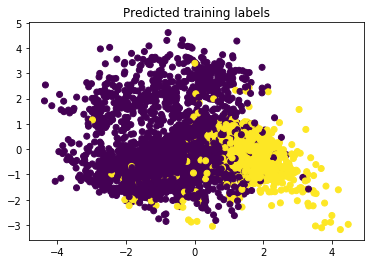

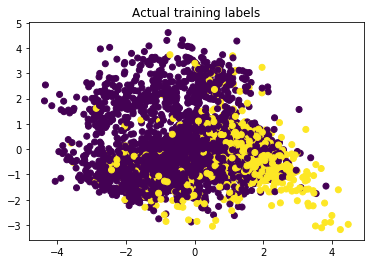

In [ ]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
# Use PCA model for visualizing your data
x = X_train_pca[:,0]
y = X_train_pca[:,1]
# F1-score for average linkage + cosine 0.5473776994270604
# So choose average linkage + cosine 
plt.scatter(x,y,c=average_cosine)
plt.title("Predicted training labels")
plt.show()
plt.scatter(x,y,c=y_train)
plt.title("Actual training labels")
plt.show()



# Visualize the predicted training labels versus actual training labels. 

###################end code for Task 2-b

1. The F1-score for average linkage and cosine distance is max hence we choose agglomerative model for no. of clusters=2 with average linkage and affinity as cosine distance.<br>
2. PCA is used to reduce the dimensiolity.<br>
3. Using PCA 14D data is reduced to 2D for better visualization.<br>
4. From the above predicted training labels we can see two clusters are well separated with minor overlapping.<br>
5. The actual training labels are overlapped.

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. Use number cluster = 2 for below example

F1-score for complete linkage + cosine 0.008156606851549756
F1-score for complete linkage + euclidean 0.0048543689320388345
F1-score for complete linkage + manhattan 0.39379947229551454
F1-score for average linkage + cosine 0.3889784079922656
F1-score for average linkage + euclidean 0.39238464020651825
F1-score for average linkage + manhattan 0.0
The highest is F1-score for complete linkage + manhattan 0.39379947229551454


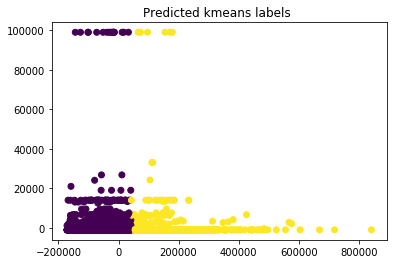

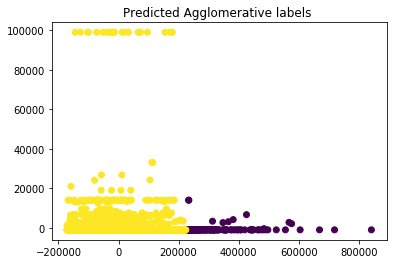

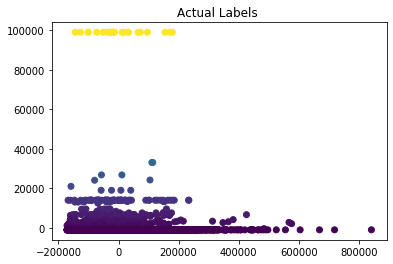

In [ ]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
X = clusteringdata.drop(columns=['Class'])
y = clusteringdata['Class']
Kmean = KMeans(n_clusters=2, random_state=2021).fit_predict(X)




### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = X
cosine_distance = pairwise_distances(pdm_train,metric='cosine')
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
complete_cosine = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="cosine").fit_predict(X)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
complete_euclidean = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="euclidean").fit_predict(X)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
complete_manhattan = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="manhattan").fit_predict(X)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
average_cosine = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="cosine").fit_predict(X)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
average_euclidean = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="euclidean").fit_predict(X)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
average_manhattan = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="manhattan").fit_predict(X)

print("F1-score for complete linkage + cosine", f1_score(y, complete_cosine))
print("F1-score for complete linkage + euclidean", f1_score(y, complete_euclidean))
print("F1-score for complete linkage + manhattan", f1_score(y, complete_manhattan))
print("F1-score for average linkage + cosine", f1_score(y, average_cosine))
print("F1-score for average linkage + euclidean", f1_score(y, average_euclidean))
print("F1-score for average linkage + manhattan", f1_score(y, average_manhattan))

print("The highest is F1-score for complete linkage + manhattan 0.39379947229551454")


### Visualize Clusters
#  Model and fit the data to the PCA model
# https://www.youtube.com/watch?v=QdBy02ExhGI&t=470s&ab_channel=KrishNaik 
pca = PCA(n_components=2)
pca = pca.fit(X)
X_pca = pca.transform(X)
x = X_pca[:,0]
y = X_pca[:,1]

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
plt.title("Predicted kmeans labels ")
plt.scatter(x,y,c=Kmean)
plt.show()
plt.title("Predicted Agglomerative labels ")
plt.scatter(x,y,c=complete_manhattan)
plt.show()
plt.title("Actual Labels ")
plt.scatter(x,y,c=y)
plt.show()







###################end code for Task 3-a

1. When we trained Agglomerative clustering model using 80% of the data we got highest F1-score(0.547) for average linkage + cosine.<br>
2. After training the Agglomerative clustering model with entire dataset we got the highest F1-score(0.3937) for complete linkage + manhattan.<br>
3. From the above predicted Kmeans labels, two clusters are separated well, but incase of predicted agglomerative labels, the far away points are clustered yellow.


## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out 2D confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model in at least 3-4 lines. Type your reasoning.

In [ ]:
###################begin code for Task 3-b

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = clusteringdata.drop(columns=['Class'])
y = clusteringdata['Class']
print("Confusion Matrix for Kmean: ")
print("\n")
print(confusion_matrix(y, Kmean))
print("\n")
print("Confusion Matrix for agglomerative: ")
print("\n")
print(confusion_matrix(y, complete_manhattan))
print("\n")
print("Precision, Recall, and F1-score for Kmean: ")
print("\n")
print(classification_report(y,Kmean))
print("\n")
print("Precision, Recall, and F1-score for agglomerative: ")
print("\n")
print(classification_report(y,complete_manhattan))
print("\n")







###################end code for Task 3-b

Confusion Matrix for Kmean: 


[[2712 1067]
 [ 927  294]]


Confusion Matrix for agglomerative: 


[[ 130 3649]
 [  27 1194]]


Precision, Recall, and F1-score for Kmean: 


              precision    recall  f1-score   support

           0       0.75      0.72      0.73      3779
           1       0.22      0.24      0.23      1221

    accuracy                           0.60      5000
   macro avg       0.48      0.48      0.48      5000
weighted avg       0.62      0.60      0.61      5000



Precision, Recall, and F1-score for agglomerative: 


              precision    recall  f1-score   support

           0       0.83      0.03      0.07      3779
           1       0.25      0.98      0.39      1221

    accuracy                           0.26      5000
   macro avg       0.54      0.51      0.23      5000
weighted avg       0.69      0.26      0.15      5000





1. The F1 score for K means = 0.6.<br>
2. The F1 score for Agglomerative clustering model is 0.26.<br>
3. Precision for KMeans is 0.48 which is less when compared to precision(0.54) of agglomerative.<br>
4. Similarly Recall of agglomerative model(0.51) is high compared to Kmeans(0.48).<br>
5. For this dataset with 5000 datapoints, The F1-Score for Kmeans is high compared to F1-Score of Agglomertaive.<br>
6. Hence the Kmeans model is giving the better result compared to agglomerative clustering.<br>


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a 2D confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[10 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points